In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Working With Missing And Duplicate Data
---
Missing or duplicate data may exist in a data set for a number of different reasons. <br> 
Sometimes, missing or duplicate data is introduced as we perform cleaning and transformation tasks such as:

- Combining data
- Reindexing data
- Reshaping data

__In this mission, we'll explore each of these options in detail and learn when to use them.__ ,br>
We'll work with the `2015`, `2016`, and `2017` `World Happiness Reports` again - more specifically, we'll combine them and clean missing values as we start to define a more complete data cleaning workflow. You can find the data sets here, along with descriptions of each of the columns.

- https://www.kaggle.com/unsdsn/world-happiness#2015.csv

__In this mission, we'll work with modified versions of the data sets.__ Each data set has already been updated so that each contains the same countries. For example, if a country appeared in the original 2015 report, but not in the original 2016 report, a row like the one below was added to the 2016 data set.

### Instructions

We've already read in the modified `2015`, `2016`, and `2017` `World Happiness Reports` to the variables `happiness2015`, `happiness2016`, and `happiness2017`, respectively. We also updated each dataframe so that each contain the same countries, as described above.

1. Use the `DataFrame.shape` attribute to confirm the number of rows and columns for`happiness2015`, `happiness2016`, and `happiness2017`.
2. Assign the result for `happiness2015` to `shape_2015`.
3. Assign the result for `happiness2016` to `shape_2016`.
4. Assign the result for `happiness2017` to `shape_2017`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

happiness2015 = pd.read_csv("wh_2015.csv")
happiness2016 = pd.read_csv("wh_2016.csv")
happiness2017 = pd.read_csv("wh_2017.csv")

shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape
print(shape_2015, shape_2016, shape_2017)

(164, 13) (164, 14) (164, 13)


### Instructions

1. Use the `DataFrame.isnull()` and `DataFrame.sum()` methods to confirm the number of missing values in `happiness2016`. Assign the result to `missing_2016`.
1. Use the `DataFrame.isnull()` and `DataFrame.sum()` methods to confirm the number of missing values in `happiness2017`. Assign the result to `missing_2017`.

In [3]:
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

### Instructions

We've already updated the column names for `happiness2017`.

1. Update the columns names for `happiness2015` and `happiness2016` to match the formatting of the column names in `happiness2017`. Use the following criteria to rename the columns:
    - All letters should be uppercase.
    - There should be only one space between words.
    - There should be no parentheses in column names
    - For example, the `Health (Life Expectancy)` columns should both be renamed to `HEALTH LIFE EXPECTANCY`.
2. Use the `pd.concat()` function to combine `happiness2015`, `happpiness2016`, and `happiness2017`. Set the `ignore_index` argument equal to `True` to reset the index in the resulting dataframe. Assign the result to `combined`.
3. Use the `DataFrame.isnull()` and `DataFrame.sum()` methods to check for missing values. Assign the result to a variable named `missing`.

In [4]:
happiness2015.columns = happiness2015.columns.str.replace('.', ' ').str.replace('(', ' ').str.replace(')', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('.', ' ').str.replace('(', ' ').str.replace(')', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('(', ' ').str.replace(')', ' ').str.replace('\s+', ' ').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort = True)
missing = combined.isnull().sum()

---
#  Visualizing `NaN's`
In the last exercise, we corrected some of the missing values by fixing the column names. <br>
Note that we could have cleaned the column names without changing the capitalization. <br>
__It's good practice, however, to make the capitalization uniform, because a stray uppercase or lowercase letter could've reintroduced missing values__.

We also confirmed there are still values missing:

In [5]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

We can learn more about where these missing values are located by visualizing them with a __`heatmap`__, a graphical representation of our data in which values are represented as colors. We'll use the seaborn library to create the __`heatmap`__:

- __https://seaborn.pydata.org/generated/seaborn.heatmap.html__

Note below that we first reset the index to be the `YEAR` column so that we'll be able to see the corresponding year on the left side of the heatmap:

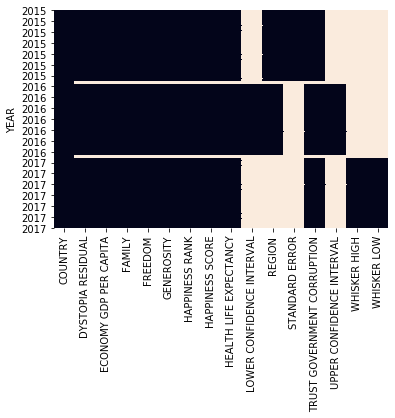

In [6]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False);

### Instructions

1. Confirm that the `REGION` column is missing from the 2017 data. Recall that there are 164 rows for the year 2017.
    - Select just the rows in combined in which the `YEAR` column equals `2017`. Then, select just the `REGION` column. Assign the result to `regions_2017`.
    - Use the `Series.isnull()` and `Series.sum()` to calculate the total number of missing values in `regions_2017`, the `REGION` column for `2017`. Assign the result to `missing`.
2. Use the variable inspector to view the results of `missing`. Are all 164 region values missing for the year 2017?

#### Solution:

In [7]:
regions_2017 = combined.REGION[combined.YEAR == 2017]
missing = regions_2017.isnull().sum()

### Instructions

We've already created a dataframe named `regions` containing all of the countries and corresponding regions from the `happiness2015` and `happiness2016` dataframes.

1. Use the `pd.merge()` function to assign the `REGION` in the regions dataframe to the corresponding country in combined.
    - Set the left parameter equal to `combined`.
    - Set the right parameter equal to `regions`.
    - Set the on parameter equal to `'COUNTRY'`.
    - Set the how parameter equal to `'left'` to make sure we don't drop any rows from combined.
    - Assign the result back to `combined`.
2. Use the `DataFrame.drop()` method to drop the original region column with missing values, now named `REGION_x`.
    - Pass `'REGION_x'` into the `df.drop()` method.
    - Set the `axis` parameter equal to `1`.
    - Assign the result back to `combined`.
3. Use the `DataFrame.isnull()` and ``DataFrame.sum()` methods to check for missing values. Assign the result to a variable named `missing`.

In [8]:
r_2015 = happiness2015[['COUNTRY', 'REGION']]
r_2016 = happiness2016[['COUNTRY', 'REGION']]
n_regions = pd.concat([r_2015, r_2016])
rg_null = n_regions.REGION.notnull()
n_regions = n_regions[rg_null]
n_regions = n_regions.drop_duplicates(subset = 'COUNTRY' , keep='first')

In [9]:
n_regions.shape

(164, 2)

In [10]:
combined = pd.merge(left = combined, right = n_regions, how='left', on = 'COUNTRY')
combined = combined.drop('REGION_x', axis = 1)
combined = combined.rename(columns={"REGION_y": "REGION"})

missing = combined.isnull().sum()
combined.tail(3)

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Latin America and Caribbean
491,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


In [11]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
REGION                           0
dtype: int64

### Instructions

1. Standardize the capitalization so that all the values in the `COUNTRY` column in `combined` are uppercase.
    - As an example, `'India'` should be changed to `'INDIA'`.
2. Use the `df.duplicated()` method to identify any rows that have the same value in the `COUNTRY` and `YEAR` columns. Assign your result to `dups`.
3. Use `dups` to index combined. Print the results.

In [12]:
combined.COUNTRY = combined.COUNTRY.str.upper()
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Instructions

1. Use the `df.drop_duplicates()` method to drop rows with more than one country for each year. Assign the result back to `combined`.
2. Pass a list containing the `COUNTRY` and `YEAR` columns into the `drop_duplicates()` method.
3.  we'll `keep` the `first` row

In [13]:
combined_new = combined.drop_duplicates(['COUNTRY', 'YEAR'], keep = 'first')

In [14]:
# cheking for duplicates
dups_2 = combined_new.duplicated(['COUNTRY', 'YEAR'])
combined_new[dups_2]
# no duplicates

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION


### Instructions

1. Use the __`df.drop()`__ method to drop the columns in __`columns_to_drop`__.
    - Pass `columns_to_drop` into the `df.drop()` method.
    - Set the `axis` parameter equal to `1`.
    - Assign the result back to `combined`.
2. Use the __`df.isnull()`__ and __`df.sum()`__ methods to calculate the number of missing values for each column. Assign the result to `missing`.

- __https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html__ – doc


#### Solution:

In [15]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW'] 
combined = combined.drop(columns_to_drop, axis=1)

In [16]:
missing = combined.isnull().sum()
missing

COUNTRY                         0
DYSTOPIA RESIDUAL              22
ECONOMY GDP PER CAPITA         22
FAMILY                         22
FREEDOM                        22
GENEROSITY                     22
HAPPINESS RANK                 22
HAPPINESS SCORE                22
HEALTH LIFE EXPECTANCY         22
TRUST GOVERNMENT CORRUPTION    22
YEAR                            0
REGION                          0
dtype: int64

### Instructions

1. Use the __`df.dropna()`__ method to drop all columns in combined with 159 or less non null values.
    - Set the `thresh` argument equal to `159` and the axis parameter equal to `1`.
2. Use the __`df.isnull()`__ and __`df.sum()`__ methods to calculate the number of missing values for each column. Assign the result to __`missing`__.

In [17]:
combined = combined.dropna(thresh = 159, axis =1)

In [18]:
missing = combined.isnull().sum()

In [19]:
missing

COUNTRY                         0
DYSTOPIA RESIDUAL              22
ECONOMY GDP PER CAPITA         22
FAMILY                         22
FREEDOM                        22
GENEROSITY                     22
HAPPINESS RANK                 22
HAPPINESS SCORE                22
HEALTH LIFE EXPECTANCY         22
TRUST GOVERNMENT CORRUPTION    22
YEAR                            0
REGION                          0
dtype: int64

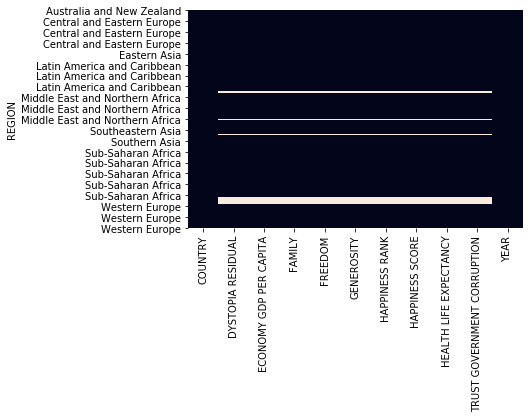

In [20]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False);

### Instructions

1. Use the __`Series.mean()`__ method to calculate the mean of the __`HAPPINESS SCORE`__ column. Assign the result to __`happiness_mean`__. Print `happiness_mean`.
2. Use the __`Series.fillna()`__ method to replace all the missing values in the __`HAPPINESS SCORE`__ column with __`happiness_mean`__. Assign the result to a new column named __`HAPPINESS SCORE UPDATED`__.
Print the mean of `__HAPPINESS SCORE UPDATED`.
3. Based on the results of this exercise, try to answer the question below: <br>
     _Did replacing missing values with the mean of a series cause the mean to change?_

In [21]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)

In [22]:
combined.mean()

DYSTOPIA RESIDUAL                 2.092717
ECONOMY GDP PER CAPITA            0.927830
FAMILY                            0.990347
FREEDOM                           0.402828
GENEROSITY                        0.242241
HAPPINESS RANK                   78.829787
HAPPINESS SCORE                   5.370728
HEALTH LIFE EXPECTANCY            0.579968
TRUST GOVERNMENT CORRUPTION       0.134790
YEAR                           2016.000000
HAPPINESS SCORE UPDATED           5.370728
dtype: float64

### Instructions

1. Use the __`DataFrame.dropna()`__ method to drop any remaining rows with missing values. Assign the result back to __`combined`__.
2. Use the __`df.isnull()`__ and __`df.sum()`__ methods to confirm there are no missing values left in `combined`. Assign the result to `missing`.

In [23]:
combined = combined.dropna()
missing = combined.isnull().sum()

__--- DONE ----__